# Do I want this wiggler?

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'jpeg'
# pio.renderers.default = 'iframe'

import params.sources as ps
import params.params_1_5 as p15

import xrt.backends.raycing.materials as rm
import xrt.backends.raycing.sources as rsources



## Wiggler spectrum
Computing spectrum of the total flux defined by a $2 \times 0.2$ mrad slit.

/nix/store/i63lpv0lgmz4gmar81x5rxksyc2nm66f-python3.12-plotly-5.24.1/lib/python3.12/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




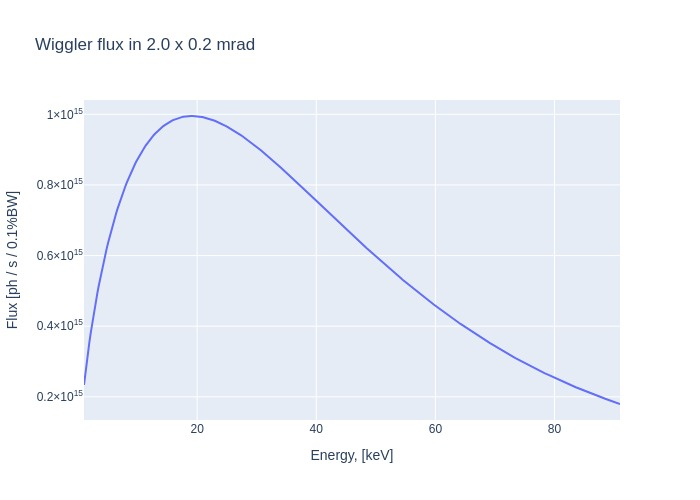

In [2]:
energy = np.linspace(1.0e3, 91.0e3, 401)

theta = np.linspace(-p15.front_end_h_angle, p15.front_end_h_angle, 51) / 2.
psi = np.linspace(-p15.front_end_v_angle, p15.front_end_v_angle, 51) / 2.

source = rsources.Wiggler(
    eMin=energy[0],
    eMax=energy[-1],
    distE='BW',
    **ps.ring_kwargs,
    **ps.wiggler_1_5_kwargs
)

I0, l1, l2, l3 = source.intensities_on_mesh(energy, theta, psi)

dtheta, dpsi = theta[1] - theta[0], psi[1] - psi[0]
flux = I0.sum(axis=(1, 2)) * dtheta * dpsi

# plotting
fig = go.Figure()
fig.add_trace(go.Line(x=energy * 1e-3, y=flux))
fig.update_layout(
    title=dict(text=f"Wiggler flux in {p15.front_end_h_angle * 1e3} x {p15.front_end_v_angle * 1e3} mrad"),
    xaxis=dict(title=dict(text="Energy, [keV]")),
    yaxis=dict(title=dict(text="Flux [ph / s / 0.1%BW]"))
)
fig.show()


## Intensity distribution for selected energies
Same wiggler, same slit. Looking at the intensity distribution within the slit for 30, 60, 90 keV

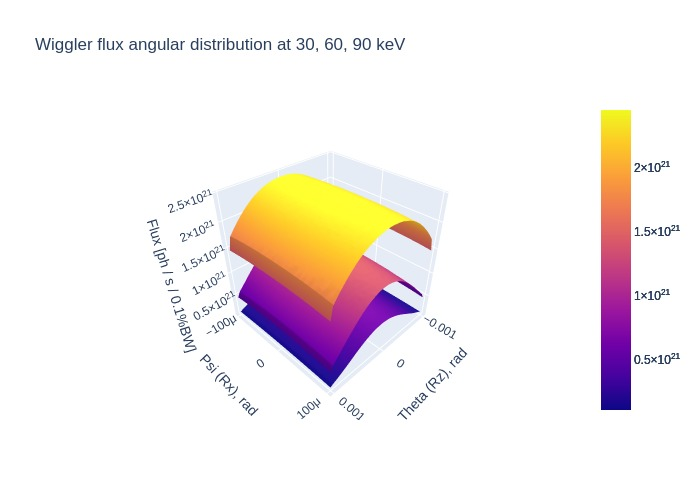

In [3]:
energy = np.array([30e3, 60e3, 90e3])

theta = np.linspace(-p15.front_end_h_angle, p15.front_end_h_angle, 51) / 2.
psi = np.linspace(-p15.front_end_v_angle, p15.front_end_v_angle, 51) / 2.

source = rsources.Wiggler(
    eMin=energy[0],
    eMax=energy[-1],
    distE='BW',
    **ps.ring_kwargs,
    **ps.wiggler_1_5_kwargs
)

I0, l1, l2, l3 = source.intensities_on_mesh(energy, theta, psi)

fig = go.Figure(
    data = [go.Surface(x=theta, y=psi, z=I0[ii-1], cmin=I0.min(), cmax=I0.max(), name=f"Flux {ii//1000} keV") for ii in (1, 2, 3)]
)
fig.update_layout(
    title=dict(text=f"Wiggler flux angular distribution at 30, 60, 90 keV"),
    scene_camera = dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=1.5, y=1.5, z=1.5)
    ),
    showlegend=True)
fig.update_scenes(xaxis_title_text='Theta (Rz), rad',  
                  yaxis_title_text='Psi (Rx), rad',  
                  zaxis_title_text='Flux [ph / s / 0.1%BW]')
fig.show()

## Wiggler photon source size

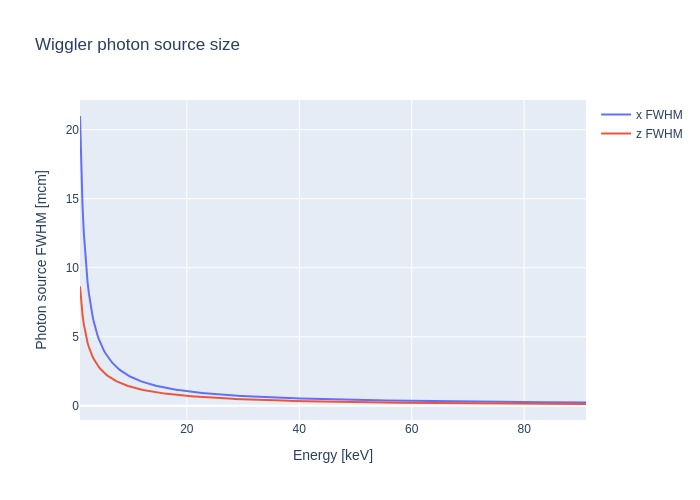

In [4]:
energy = np.linspace(1.0e3, 91.0e3, 401)

theta = np.linspace(-p15.front_end_h_angle, p15.front_end_h_angle, 51) / 2.
psi = np.linspace(-p15.front_end_v_angle, p15.front_end_v_angle, 51) / 2.

flux, theta2, psi2, dx2, dz2 = source.real_photon_source_sizes(energy, theta, psi)
# plotting
fig = go.Figure()
fig.add_trace(go.Line(x=energy * 1e-3, y=2.e3 * np.sqrt(2. * dx2 * np.log(2)), name = "x FWHM"))
fig.add_trace(go.Line(x=energy * 1e-3, y=2.e3 * np.sqrt(2. * dz2 * np.log(2)), name = "z FWHM"))
fig.update_layout(
    title=dict(text=f"Wiggler photon source size"),
    xaxis=dict(title=dict(text="Energy [keV]")),
    yaxis=dict(title=dict(text="Photon source FWHM [mcm]")),
    showlegend=True)
fig.show()